## Train a model with Iris data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

done

# All requested packages already installed.



In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing

In [3]:
column_list_file = 'iris_train_column_list.txt'
train_file = 'iris_train.csv'
validation_file = 'iris_validation.csv'

In [4]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [5]:
columns

['encoded_class', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
# Encode Class Labels to integers
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

LabelEncoder()

In [7]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [8]:
df_train.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,2,5.9,3.0,5.1,1.8
1,1,6.4,3.2,4.5,1.5
2,0,4.8,3.0,1.4,0.3
3,2,7.4,2.8,6.1,1.9
4,2,6.4,3.1,5.5,1.8


In [9]:
df_validation.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,1,6.8,2.8,4.8,1.4
1,2,4.9,2.5,4.5,1.7
2,2,6.0,3.0,4.8,1.8
3,0,5.1,3.4,1.5,0.2
4,0,4.8,3.1,1.6,0.2


In [10]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [11]:
# Launch a classifier
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
classifier = xgb.XGBClassifier (max_depth=5,
                                objective="multi:softmax",
                                num_class=3)

In [12]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softmax',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [13]:
classifier.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)], eval_metric=['merror','mlogloss'])

[0]	validation_0-merror:0.019048	validation_0-mlogloss:0.966109	validation_1-merror:0.111111	validation_1-mlogloss:0.985623
[1]	validation_0-merror:0.019048	validation_0-mlogloss:0.854989	validation_1-merror:0.111111	validation_1-mlogloss:0.892098
[2]	validation_0-merror:0.019048	validation_0-mlogloss:0.760493	validation_1-merror:0.111111	validation_1-mlogloss:0.813723
[3]	validation_0-merror:0	validation_0-mlogloss:0.677534	validation_1-merror:0.088889	validation_1-mlogloss:0.743413
[4]	validation_0-merror:0	validation_0-mlogloss:0.605622	validation_1-merror:0.088889	validation_1-mlogloss:0.683396
[5]	validation_0-merror:0	validation_0-mlogloss:0.542874	validation_1-merror:0.088889	validation_1-mlogloss:0.631322
[6]	validation_0-merror:0	validation_0-mlogloss:0.487801	validation_1-merror:0.088889	validation_1-mlogloss:0.586579
[7]	validation_0-merror:0	validation_0-mlogloss:0.439282	validation_1-merror:0.088889	validation_1-mlogloss:0.547812
[8]	validation_0-merror:0	validation_0-mlog

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [14]:
eval_result = classifier.evals_result()

In [15]:
training_rounds = range(len(eval_result['validation_0']['mlogloss']))

In [16]:
print(training_rounds)

range(0, 100)


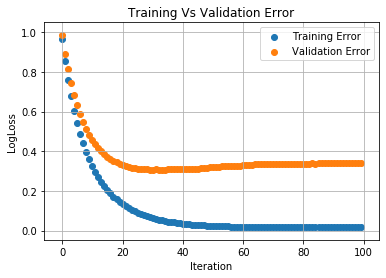

In [17]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['mlogloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['mlogloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()

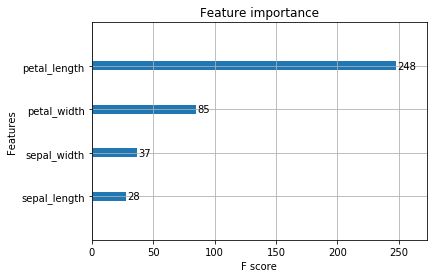

In [18]:
xgb.plot_importance(classifier)

In [19]:
df = pd.read_csv('iris_all.csv')

In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
X_test = df.iloc[:,:-1]
print(X_test[:5])

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [22]:
result = classifier.predict(X_test)

In [23]:
result[:5]

array([0, 0, 0, 0, 0])

In [24]:
df['predicted_class'] = le.inverse_transform(result)

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,predicted_class
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


In [26]:
print('Confusion matrix - Actual versus Predicted')
pd.crosstab(df['class'], df['predicted_class'])

Confusion matrix - Actual versus Predicted


predicted_class,Iris-setosa,Iris-versicolor,Iris-virginica
class,,,
Iris-setosa,50,0,0
Iris-versicolor,0,47,3
Iris-virginica,0,1,49


In [27]:
import sklearn.metrics as metrics
print(metrics.classification_report(df['class'], df['predicted_class']))

precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150

